In [1]:
!pip install numpy
!pip install scipy
!pip install matplotlib

import numpy as np
import scipy
from scipy.special import gamma
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8.6, 6]
#plt.rcParams['figure.dpi'] = 100

In [2]:
rng = np.random.default_rng()

# Volume d'une boule de dimension n

La formule pour le volume d'une boule de rayon unité de dimension $n$ est selon [la page Wikipédia](https://fr.wikipedia.org/wiki/Calcul_du_volume_de_l%27hypersph%C3%A8re)
$$ V_n = \frac{\pi^{n/2}}{\Gamma\left(\frac n2 + 1\right)}$$

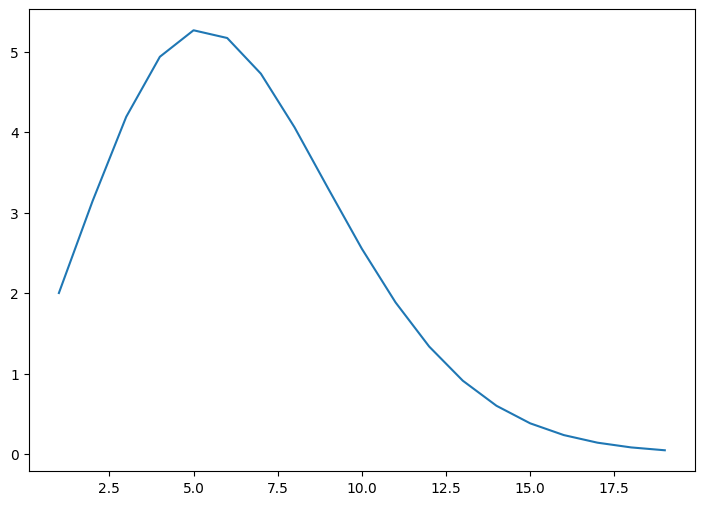

In [3]:
dims = np.arange(1, 20)
volumes = np.pi**(dims/2) / gamma(1 + dims/2)
plt.plot(dims, volumes)

Fraction de l'espace dans une boule de rayon 1 de dimension n.
$$\frac{V_n}{2^n}$$

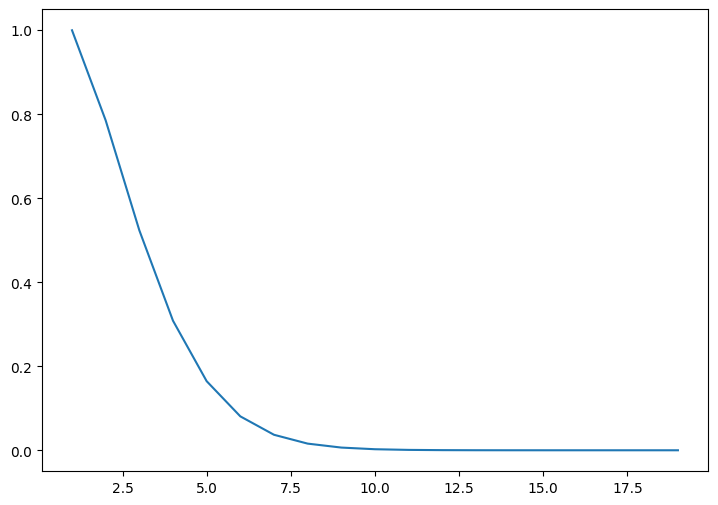

In [4]:
fractions = volumes / 2**dims
plt.plot(dims, fractions)

# Orthogonalité

In [5]:
n = 1
m = 10000

# Direction choisie une fois pour toute
v = rng.normal(size=n)
v /= np.linalg.norm(v)

# Autres vecteurs indépendant
X = rng.normal(size=(m, n))
X /= np.linalg.norm(X, axis=1, keepdims=True)

# Les angles entre X et v
angles = np.arccos(np.dot(X, v)) * 180.0 / np.pi # en degré
print(f'Moytenne: {np.mean(angles)} +/- {np.std(angles)}')

Moytenne: 92.088 +/- 89.97577593997175


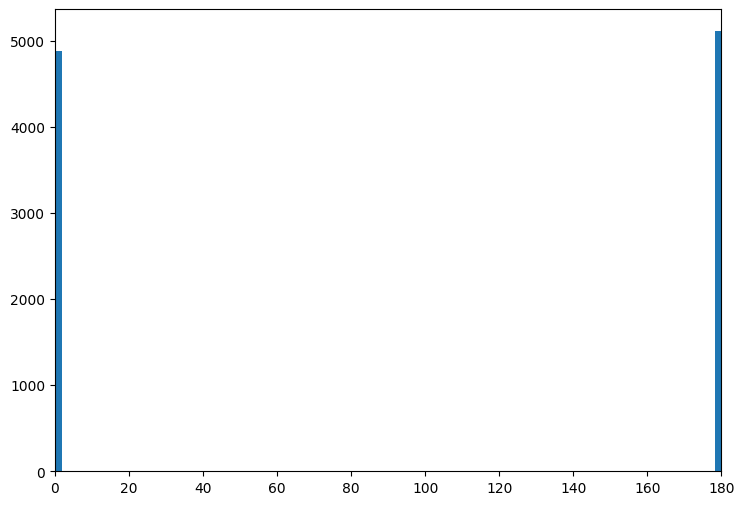

In [6]:
plt.hist(angles, bins=100)
plt.xlim(0, 180)
pass

# Direction

In [7]:
n = 200
m = 1000

X = rng.normal(size=(m, n))
X /= np.linalg.norm(X, axis=1, keepdims=True)
ps = np.inner(X, X)
mask = np.tri(m, m, -1)
ps = ps[mask.nonzero()]
print(f'Moytenne: {np.mean(ps)} +/- {np.std(ps)}')

Moytenne: 6.641166389475038e-05 +/- 0.07069567381827471


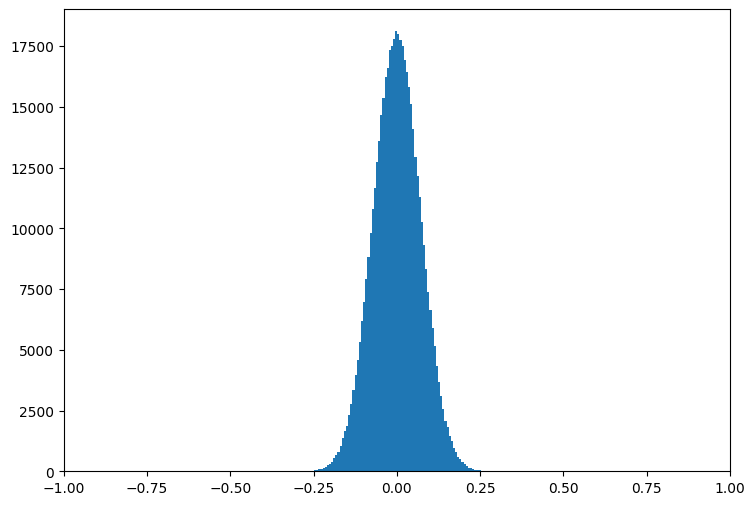

In [8]:
plt.hist(ps, bins=100)
plt.xlim(-1, 1)
pass